In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler

In [2]:
imgpath = 'datasets\\libra\\tempB\\2ANP-2A_5.548-00-5.550-70_FotoHDI_T01_CX1-3.png'
niipath = 'datasets\\nii_data_libra\Libra_CX1_T1_221_184_1485_Energy1.nii'

In [3]:
nii = np.array(nib.load(niipath).get_data())
scaler = MinMaxScaler()
slc = nii[:,100,:]
slc = scaler.fit_transform(slc)

In [4]:
img0 = cv2.imread(imgpath)
width = slc.shape[0]
scale_percent = (width/img0.shape[1])
height = int(img0.shape[0] * scale_percent)
dim = (width, height)
img = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

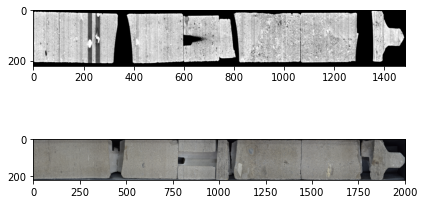

In [5]:
plt.figure()
plt.subplot(2,1,1)
plt.imshow(slc,cmap='gray')

lim = int(slc.shape[1]*1.35)
crop = img[:,-lim:,:]
plt.subplot(2,1,2)
plt.imshow(crop)
plt.tight_layout()
plt.show()

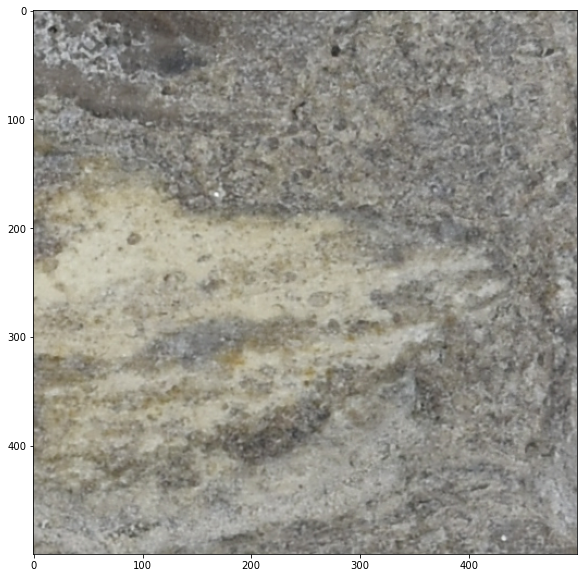

In [38]:
ws = 500
x,y = 6100,2800
w = img0[x:x+ws,y:y+ws,:]
w = cv2.cvtColor(w,cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10,10])
plt.imshow(w)
plt.show()